## Assignment 1

### Part I

To use PCA Algorithm for dimensionality reduction. You have a dataset that includes measurements for different variables on wine (alcohol, ash, magnesium, and so on). Apply PCA algorithm & transform this data so that most variations in the measurements of the variables are captured by a small number of principal components so that it is easier to distinguish between red and white wine by inspecting these principal components.

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('datasets/Wine.csv')
data.shape

(178, 14)

*   The Significant Predictors can be *Color_Intensity* and *Hue*
*   The Target Variable is ***Customer_Segment***

In [3]:
data['Customer_Segment'].unique()

array([1, 2, 3], dtype=int64)

3 classes/category of wines found

In [4]:
x = data.iloc[:, :-1]  # Features (all columns except the last)
y = data.iloc[:, -1]   # Target (last column)
xScaled = StandardScaler().fit_transform(x)

### Principal Component Analysis (PCA)
- Principal Component Analysis (PCA) is a technique used to simplify complex data by finding the most important patterns within it.
- Imagine you have a large dataset with many variables, like a collection of photos with different features (e.g., color, brightness, shape).
- Analyzing all these features at once can be overwhelming and computationally expensive.
- PCA helps by reducing the number of features (or dimensions) while still retaining the most critical information.
- PCA looks at the dataset and finds directions (called "principal components") along which the data varies the most.

In [5]:
pca = PCA(n_components=2)
pc = pca.fit_transform(xScaled)

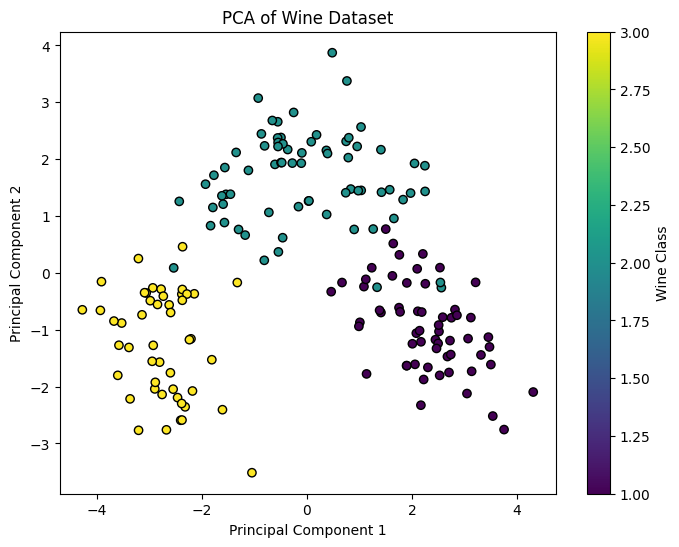

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(pc[:, 0], pc[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Dataset')
plt.colorbar(label='Wine Class')
plt.show()

# Part II

Apply LDA Algorithm on Iris Dataset and classify which species a given flower belongs to

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [8]:
iris = pd.read_csv("./datasets/Iris.csv")
iris.drop(columns="Id", inplace=True)

In [9]:
x = iris.iloc[:, :-1]  # Features: sepal length, sepal width, petal length, petal width
y = iris.iloc[:, -1]  # Target: species (0 - Setosa, 1 - Versicolour, 2 - Virginica)

In [10]:
iris.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
93,5.0,2.3,3.3,1.0,Iris-versicolor
140,6.7,3.1,5.6,2.4,Iris-virginica
90,5.5,2.6,4.4,1.2,Iris-versicolor
124,6.7,3.3,5.7,2.1,Iris-virginica
20,5.4,3.4,1.7,0.2,Iris-setosa


In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

In [12]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [13]:
lda = LinearDiscriminantAnalysis()  # Reduce to 2 components for visualization
xtrain = lda.fit_transform(xtrain, ytrain)
xtest = lda.transform(xtest)

In [14]:
lda = LinearDiscriminantAnalysis()
lda.fit(xtrain, ytrain)
ypred = lda.predict(xtest)

### Linear Discriminant Analysis (LDA)
Linear Discriminant Analysis (LDA) is a technique used to separate data into different classes, making it easier to classify or categorize new data points. It's commonly used in situations where you have labeled data, meaning you know the category each data point belongs to, and you want to maximize the separation between these categories.

In [15]:
print("Accuracy:", accuracy_score(ytest, ypred))
print("Confusion Matrix:\n", confusion_matrix(ytest, ypred))
print("Classification Report:\n", classification_report(ytest, ypred, target_names=y.unique()))

Accuracy: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [16]:
sample = pd.DataFrame([[5.1, 3.5]], columns=['PCA1','PCA2'])
predicted_species = lda.predict(sample)
print(f"Predicted Species: {predicted_species[0]}")

Predicted Species: Iris-setosa


C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(


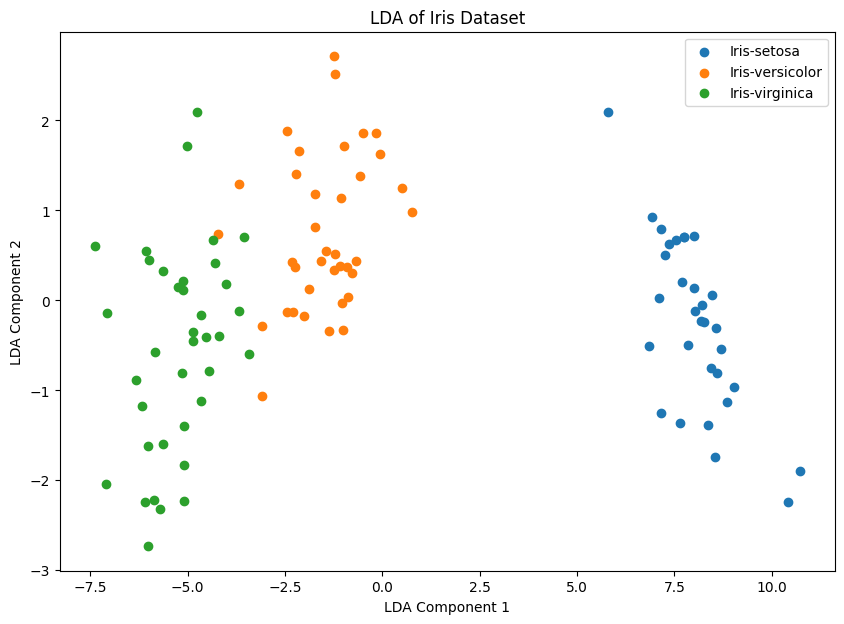

In [17]:
plt.figure(figsize=(10, 7))
for species in iris['Species'].unique():
    plt.scatter(xtrain[ytrain == species, 0], 
                xtrain[ytrain == species, 1], label=species)

plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA of Iris Dataset')
plt.legend()
plt.show()